# EDA of NBA Active Players Data

#### Questions:
- What is the current player age distribution?
- At what age do players tend to "peak" statistically?
    - This can be broken down into pts, rbs, fg%, etc
    - Over time (both age and experience), how does performance change?
- What position performs the best? Do certain positions score/rebound/assist more than others?


#### Be Careful:
- If a player is in the NBA for a long time, they have performed well (and vice versa).
- Not every season has the same number of games played... (e.g. COVID year)

#### More Data?
- Height, weight, wingspan
- Right vs. Left shooter
- Draft info
- Salary
- Num injuries

In [231]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
df = pd.read_csv('nba.csv').drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Exp'])

## Cleaning

In [244]:
# convert numerical fields to correct datatype
numeric_cols = [col for col in df.columns if col not in ['Name', 'Season', 'Tm', 'Lg', 'Pos']]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [245]:
# remove any obs of DID NOT PLAY
discard = ['Did Not Play']
df = df[df['Pos'].str.contains('|'.join(discard))==False]

In [246]:
# remove stats from current season
df = df[df['Season'].str.contains('2022-23')==False]

## Exploring

In [247]:
df.head(10)

,Name,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,2016-17,23.0,OKC,NBA,SG,68.0,6.0,15.5,2.0,...,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0
1,Álex Abrines,2017-18,24.0,OKC,NBA,SG,75.0,8.0,15.1,1.5,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
2,Álex Abrines,2018-19,25.0,OKC,NBA,SG,31.0,2.0,19.0,1.8,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
3,Precious Achiuwa,2020-21,21.0,MIA,NBA,PF,61.0,4.0,12.1,2.0,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
4,Precious Achiuwa,2021-22,22.0,TOR,NBA,C,73.0,28.0,23.6,3.6,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
6,Quincy Acy,2012-13,22.0,TOR,NBA,PF,29.0,0.0,11.8,1.4,...,0.816,1.0,1.6,2.7,0.4,0.4,0.5,0.6,1.8,4.0
7,Quincy Acy,2013-14,23.0,TOT,NBA,SF,63.0,0.0,13.4,1.0,...,0.660,1.1,2.3,3.4,0.4,0.4,0.4,0.5,1.9,2.7
8,Quincy Acy,2013-14,23.0,TOR,NBA,SF,7.0,0.0,8.7,0.9,...,0.625,0.7,1.4,2.1,0.6,0.6,0.4,0.3,1.1,2.7
9,Quincy Acy,2013-14,23.0,SAC,NBA,SF,56.0,0.0,14.0,1.1,...,0.667,1.2,2.4,3.6,0.4,0.3,0.4,0.5,2.0,2.7
10,Quincy Acy,2014-15,24.0,NYK,NBA,PF,68.0,22.0,18.9,2.2,...,0.784,1.2,3.3,4.4,1.0,0.4,0.3,0.9,2.2,5.9


In [248]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Age'>

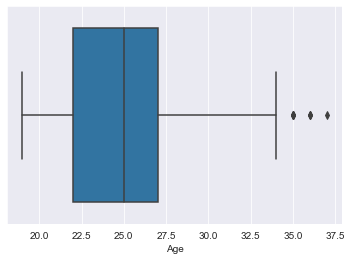

In [249]:
# age distribution
sns.boxplot(data=df, x='Age')

In [250]:
df['MP'].max()

39.6

In [251]:
# reduce df to players with 10+ yrs experience
experienced_players = df[df['Age'] >= 25]['Name'].unique()
ten = df[df['Name'].isin(experienced_players)]

# reduce df to seasons where player played at least 40 games
ten = ten[ten['G'] >= 40]

In [252]:
age = ten.groupby('Age')
age.mean()

age_df = age.mean().reset_index()

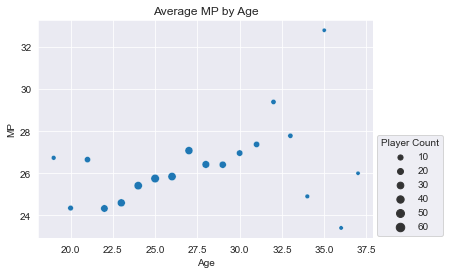

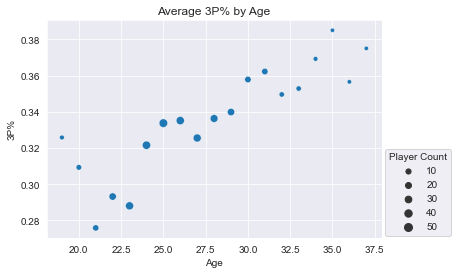

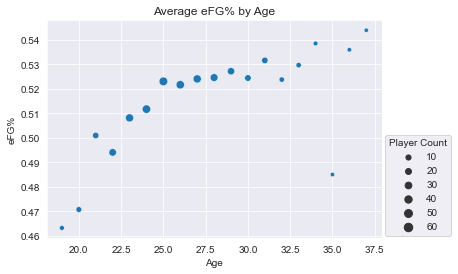

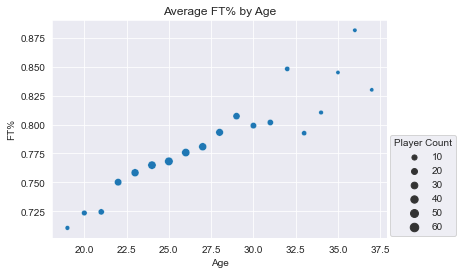

In [253]:
columns_of_interest = ['MP', '3P%', 'eFG%', 'FT%']

for col in columns_of_interest:

    temp_df = age.describe()[col][['count', 'mean']]

    sns.scatterplot(data=temp_df, x='Age', y='mean', size='count')

    plt.ylabel(col)
    
    plt.title('Average ' + col + ' by Age')

    plt.legend(title='Player Count', loc=(1.01,0.01))

    plt.show()

In [254]:
df.Pos.value_counts()
# very few are listed in multiple positions
# reduce to PG, SG, SF, PF, C
valid_pos = ['PG', 'SG', 'SF', 'PF', 'C']
pos = df[df['Pos'].isin(valid_pos)].groupby('Pos')
pos.mean().reset_index()

# make new pos df
pos_df = pos.mean().reset_index()
pos_df

,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,C,24.385542,44.325301,24.765060,19.096988,3.321687,6.350000,0.517883,0.262651,0.815060,...,0.675031,1.850602,4.010843,5.857831,1.200602,0.544578,0.864458,1.111446,2.043976,8.465663
1,PF,25.461039,48.292208,26.551948,21.261039,3.674026,7.800000,0.453344,0.818182,2.359740,...,0.740160,1.140909,3.677922,4.816883,1.370130,0.600000,0.560390,1.051299,1.881169,9.739610
2,PG,25.531707,45.448780,25.307317,21.652195,3.412195,7.927805,0.409147,1.183902,3.194634,...,0.792005,0.468293,2.101951,2.568780,3.429268,0.855610,0.216098,1.469756,1.616585,9.586829
3,SF,25.115702,49.103306,28.640496,21.962810,3.217355,7.373554,0.421191,0.964463,2.819835,...,0.758939,0.851240,2.947521,3.796694,1.577273,0.782645,0.366116,1.065702,1.694628,8.932231
4,SG,24.676991,49.429204,23.880531,22.054425,3.722566,8.592920,0.418049,1.269027,3.516372,...,0.789840,0.542035,2.346903,2.890265,1.970354,0.720796,0.244690,1.202212,1.666814,10.222124


In [256]:
# columns_of_interest = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA', '3P%', 'eFG%', 'FT%']

# for col in columns_of_interest:
#     sns.barplot(data=pos_df, x='Pos', y=col, order=valid_pos)
#     plt.title('Average ' + col + ' by Position')
#     plt.show()

In [257]:
# let's try performance stats per minute rather than per game
df2 = df

columns_of_interest = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA']

for col in columns_of_interest:
    df2[col] = (df2[col] / df2['MP']) * 36

In [258]:
df2.head()

,Name,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,2016-17,23.0,OKC,NBA,SG,68.0,6.0,15.5,2.0,...,0.898,0.3,1.0,3.019355,1.393548,1.161290,0.232258,0.5,1.7,13.935484
1,Álex Abrines,2017-18,24.0,OKC,NBA,SG,75.0,8.0,15.1,1.5,...,0.848,0.3,1.2,3.576159,0.953642,1.192053,0.238411,0.3,1.7,11.205298
2,Álex Abrines,2018-19,25.0,OKC,NBA,SG,31.0,2.0,19.0,1.8,...,0.923,0.2,1.4,2.842105,1.136842,0.947368,0.378947,0.5,1.7,10.042105
3,Precious Achiuwa,2020-21,21.0,MIA,NBA,PF,61.0,4.0,12.1,2.0,...,0.509,1.2,2.2,10.115702,1.487603,0.892562,1.487603,0.7,1.5,14.876033
4,Precious Achiuwa,2021-22,22.0,TOR,NBA,C,73.0,28.0,23.6,3.6,...,0.595,2.0,4.5,9.915254,1.677966,0.762712,0.915254,1.2,2.1,13.881356


In [259]:
# reduce df to players with 10+ yrs experience
experienced_players = df2[df2['Age'] >= 25]['Name'].unique()
ten = df2[df2['Name'].isin(experienced_players)]

# reduce df to seasons where player played at least 40 games
ten = ten[ten['G'] >= 40]

In [260]:
age = ten.groupby('Age')
age.mean()

age_df = age.mean().reset_index()

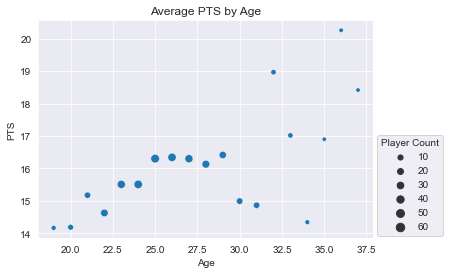

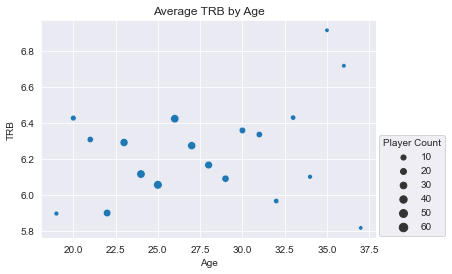

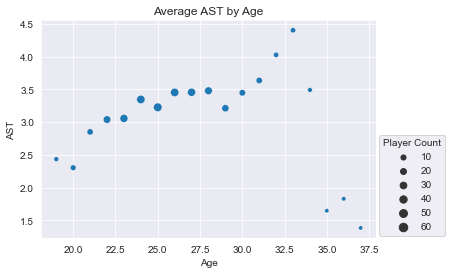

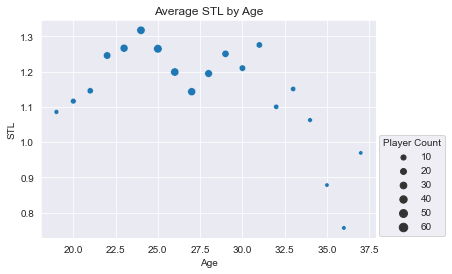

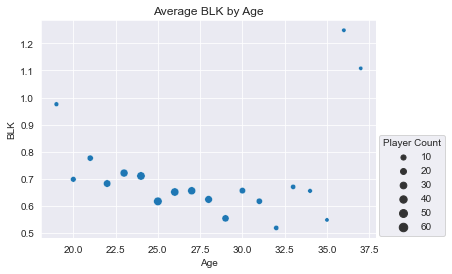

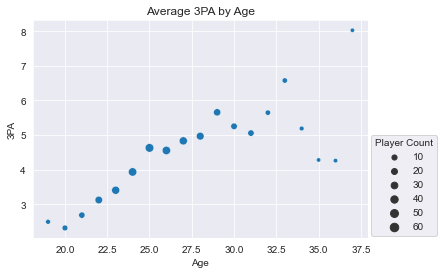

In [261]:
for col in columns_of_interest:
    
    temp_df = age.describe()[col][['count', 'mean']]

    sns.scatterplot(data=temp_df, x='Age', y='mean', size='count')

    plt.ylabel(col)
    
    plt.title('Average ' + col + ' by Age')

    plt.legend(title='Player Count', loc=(1.01,0.01))

    plt.show()